In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

In [2]:
Data=pd.read_csv("./data/Test.csv",encoding='utf-8')
Data=Data[Data['A']=='v']
Data=Data.filter(['State','Gun_ownership','Felony_sentence_aver','Region','Politics','Temper','GDP','GDP_penalty','PCPI','Education','Happy','MSA_Rate','Traveler_spending','older_rate','Female_Rate','Police_area','Felony_Result','Crimes','Misdemeanor_Result'])
Data=Data.sort_values(by='Misdemeanor_Result')
#Data

In [6]:
northeast_data=Data[Data['Region']=='northeast']
west_data=Data[Data['Region']=='west']
midwest_data=Data[Data['Region']=='midwest']
south_data=Data[Data['Region']=='south']
south_data

,State,Gun_ownership,Felony_sentence_aver,Region,Politics,Temper,GDP,GDP_penalty,PCPI,Education,Happy,MSA_Rate,Traveler_spending,older_rate,Female_Rate,Police_area,Felony_Result,Crimes,Misdemeanor_Result
16,Alabama,50.0,402.0,south,trump,17.1,228142.6,72.0450,44145,9717,40.28,75.183294,11513.8,17.4,51.7,0.617114,2150.976,3360.9,1209.924
25,Kentucky,49.0,402.0,south,trump,13.1,215398.9,574.3971,43770,11081,38.29,58.511802,10211.7,16.9,50.7,0.615641,709.824,2218.2,1508.376
27,Maryland,21.0,729.0,south,biden,12.3,426747.4,155.1809,64640,15155,61.78,97.503143,18220.7,15.9,51.6,0.119011,551.386,2506.3,1954.914
20,Florida,29.0,447.0,south,trump,21.5,1106500.1,1475.3335,52426,9663,50.58,96.784140,102843.7,20.9,51.1,0.810971,668.425,2673.7,2005.275
37,North Carolina,35.0,221.9,south,trump,15.0,591600.9,986.0015,47766,9277,49.19,79.258871,26259.9,16.7,51.4,0.606039,486.000,2700.0,2214.000
41,Texas,37.0,684.0,south,trump,18.2,1843802.7,850.9859,52813,9670,51.04,97.632905,76402.6,12.9,50.3,4.347631,446.736,2792.1,2345.364


In [5]:
r_color=['cornflowerblue','green','red','black']
region=['northeast','west','midwest','south']

def make_data(dataframe, data):
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def make_plt(dataframe,data,num):
    plt.plot(dataframe[data],dataframe['Misdemeanor_Result'],'o',color=r_color[num],label=region[num])
    
    
def make_linear(dataframe,data,num):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['Misdemeanor_Result'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color=r_color[num])
    
    print("========",region[num],"======================================")
    
    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['Misdemeanor_Result']))
    print('RMSE : ', mean_squared_error(pred, dataframe['Misdemeanor_Result'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['Misdemeanor_Result']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    

def make_name(dataframe,data):
    for i, txt in enumerate(dataframe['State']):
        plt.annotate(txt,(dataframe[data][i],dataframe['Misdemeanor_Result'][i]))

In [6]:
'''
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.data,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))
'''

def pearson_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print("========",region[num],"======================================")
    print('pearson_corr : {}\n\n'.format(pearson_corr))

# GDP

======== northeast ======================================
Score :  0.024738622356297646
RMSE :  131.40966710644287
MSE :  17268.50060902613 

기울기 :  [3.93190344e-05]
절편 :  1186.8709294221292 


======== west ======================================
Score :  0.08500062574771028
RMSE :  390.88620966509586
MSE :  152792.02890634528 

기울기 :  [0.00011092]
절편 :  2034.625085667994 


======== midwest ======================================
Score :  0.1223826522047392
RMSE :  172.85392310013265
MSE :  29878.478731106567 

기울기 :  [0.0002701]
절편 :  1505.9085782407042 


======== south ======================================
Score :  0.5575490932565508
RMSE :  262.75411955687906
MSE :  69039.7273441107 

기울기 :  [0.00050962]
절편 :  1498.2207287108274 




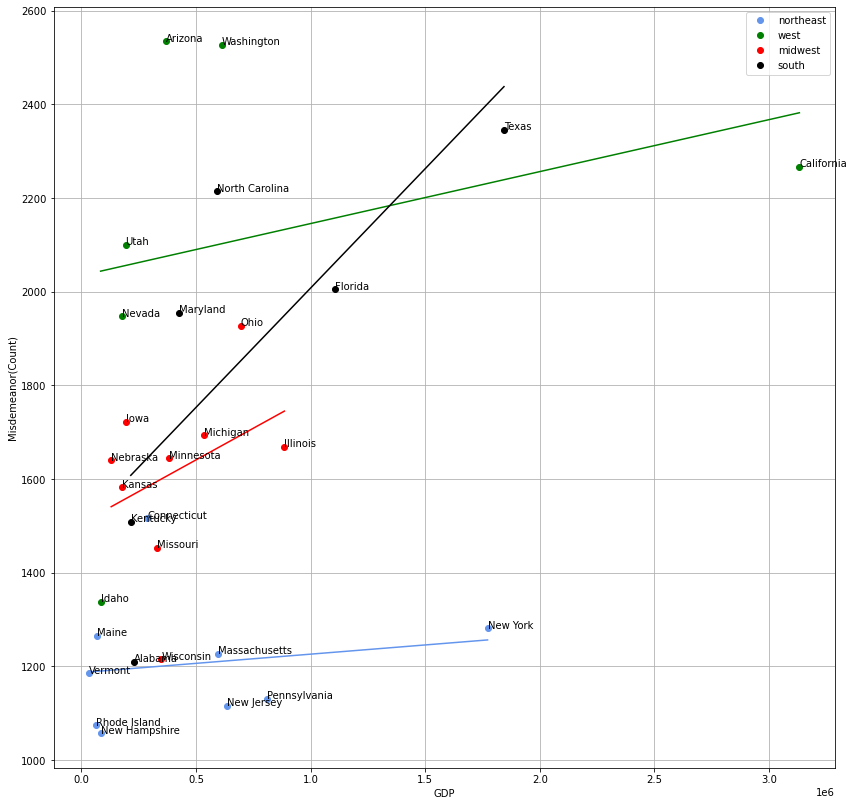

In [7]:
plt.figure(figsize=(14,14))

data='GDP'

GDP_northeast=make_data(northeast_data,data)
GDP_west=make_data(west_data, data)
GDP_midwest=make_data(midwest_data,data)
GDP_south=make_data(south_data,data)

make_name(GDP_northeast,data)
make_name(GDP_west,data)
make_name(GDP_midwest,data)
make_name(GDP_south,data)

make_plt(GDP_northeast,data,0)
make_plt(GDP_west,data,1)
make_plt(GDP_midwest,data,2)
make_plt(GDP_south,data,3)

make_linear(GDP_northeast,data,0)
make_linear(GDP_west,data,1)
make_linear(GDP_midwest,data,2)
make_linear(GDP_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('GDP')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [8]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.GDP,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'GDP',0)
spearman_corr(west_data,'GDP',1)
spearman_corr(midwest_data,'GDP',2)
spearman_corr(south_data,'GDP',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.25, pvalue=0.5164895523012263)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.7714285714285715, pvalue=0.07239650145772594)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.45, pvalue=0.22421610749233659)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.8857142857142858, pvalue=0.01884548104956266)




In [9]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.GDP,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'GDP',0)
spearman_corr(west_data,'GDP',1)
spearman_corr(midwest_data,'GDP',2)
spearman_corr(south_data,'GDP',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.43333333333333335, pvalue=0.2439524358800516)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.2571428571428572, pvalue=0.6227871720116618)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.3666666666666667, pvalue=0.33173980143301507)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.7714285714285715, pvalue=0.07239650145772594)




In [8]:
pearson_corr(GDP_northeast,data,0)
pearson_corr(GDP_west,data,1)
pearson_corr(GDP_midwest,data,2)
pearson_corr(GDP_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor       GDP
Misdemeanor     1.000000  0.157285
GDP             0.157285  1.000000


======== west ======================================
pearson_corr :              Misdemeanor       GDP
Misdemeanor     1.000000  0.291549
GDP             0.291549  1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor       GDP
Misdemeanor     1.000000  0.349832
GDP             0.349832  1.000000


======== south ======================================
pearson_corr :              Misdemeanor       GDP
Misdemeanor     1.000000  0.746692
GDP             0.746692  1.000000




# Education(money)

======== northeast ======================================
Score :  0.14250684059872243
RMSE :  123.22026384957863
MSE :  15183.233423159774 

기울기 :  [0.01981477]
절편 :  836.8555042616812 


======== west ======================================
Score :  0.26922080990848307
RMSE :  349.3277095079537
MSE :  122029.84863007332 

기울기 :  [0.09528642]
절편 :  1190.3280387891716 


======== midwest ======================================
Score :  0.04379793330964665
RMSE :  180.42698007489676
MSE :  32553.895138947195 

기울기 :  [0.02773185]
절편 :  1269.6723510396323 


======== south ======================================
Score :  0.0022734788084470825
RMSE :  394.56880576382827
MSE :  155684.54248189364 

기울기 :  [-0.00920918]
절편 :  1972.0708919835974 




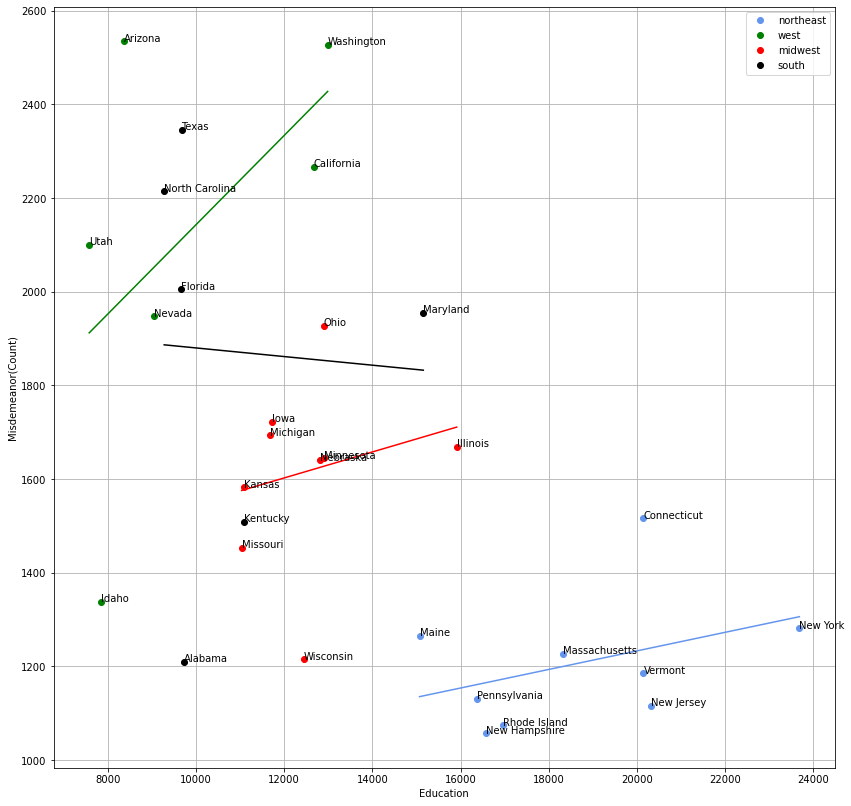

In [9]:
plt.figure(figsize=(14,14))

data='Education'

Education_northeast=make_data(northeast_data,data)
Education_west=make_data(west_data, data)
Education_midwest=make_data(midwest_data,data)
Education_south=make_data(south_data,data)

make_name(Education_northeast,data)
make_name(Education_west,data)
make_name(Education_midwest,data)
make_name(Education_south,data)

make_plt(Education_northeast,data,0)
make_plt(Education_west,data,1)
make_plt(Education_midwest,data,2)
make_plt(Education_south,data,3)

make_linear(Education_northeast,data,0)
make_linear(Education_west,data,1)
make_linear(Education_midwest,data,2)
make_linear(Education_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Education')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [10]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Education,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Education',0)
spearman_corr(west_data,'Education',1)
spearman_corr(midwest_data,'Education',2)
spearman_corr(south_data,'Education',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.26666666666666666, pvalue=0.4879222748387009)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.4285714285714286, pvalue=0.3965014577259474)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.3666666666666667, pvalue=0.33173980143301507)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.6, pvalue=0.20799999999999982)




In [12]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Education,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Education',0)
spearman_corr(west_data,'Education',1)
spearman_corr(midwest_data,'Education',2)
spearman_corr(south_data,'Education',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.09999999999999999, pvalue=0.797971695234851)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.6571428571428573, pvalue=0.15617492711370237)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.26666666666666666, pvalue=0.4879222748387009)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.3714285714285715, pvalue=0.46847813411078715)




In [11]:
pearson_corr(Education_northeast,data,0)
pearson_corr(Education_west,data,1)
pearson_corr(Education_midwest,data,2)
pearson_corr(Education_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor  Education
Misdemeanor     1.000000   0.377501
Education       0.377501   1.000000


======== west ======================================
pearson_corr :              Misdemeanor  Education
Misdemeanor     1.000000   0.518865
Education       0.518865   1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor  Education
Misdemeanor      1.00000    0.20928
Education        0.20928    1.00000


======== south ======================================
pearson_corr :              Misdemeanor  Education
Misdemeanor     1.000000  -0.047681
Education      -0.047681   1.000000




# Happy

======== northeast ======================================
Score :  0.06770543480137248
RMSE :  128.4823225247221
MSE :  16507.70720134671 

기울기 :  [7.90731838]
절편 :  770.3814918774342 


======== west ======================================
Score :  0.05233149902868084
RMSE :  397.8031091880914
MSE :  158247.31367971256 

기울기 :  [-16.88827408]
절편 :  3112.372192661859 


======== midwest ======================================
Score :  1.6077920781953914e-05
RMSE :  184.5113769185225
MSE :  34044.448212369076 

기울기 :  [-0.11435214]
절편 :  1622.4607464080948 


======== south ======================================
Score :  0.4258900347486956
RMSE :  299.305385767934
MSE :  89583.71394969181 

기울기 :  [33.30732774]
절편 :  256.6819094310281 




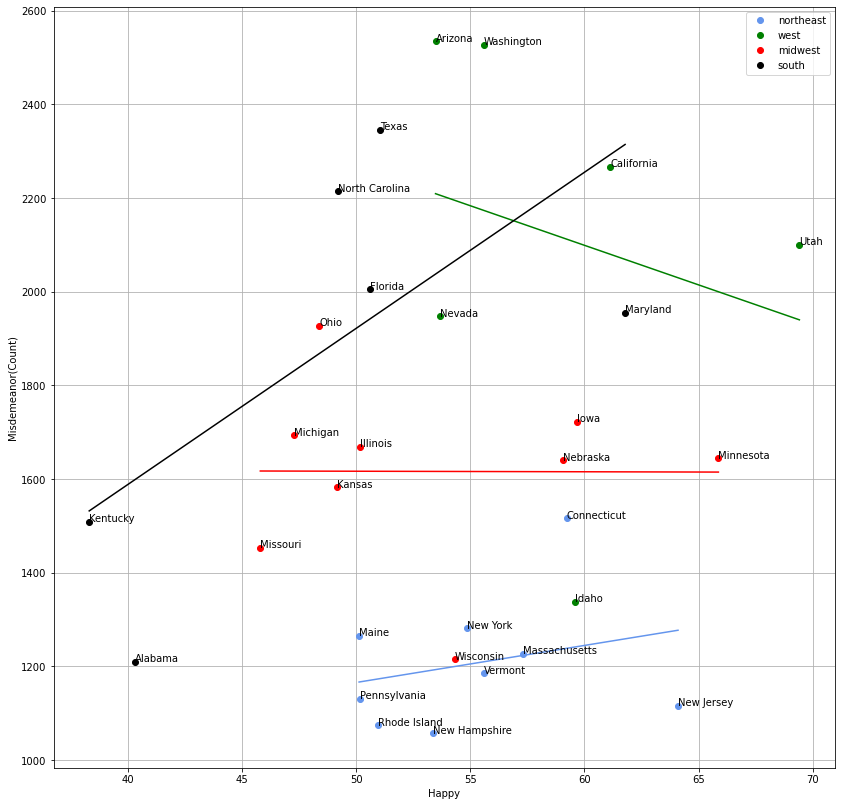

In [12]:
plt.figure(figsize=(14,14))

data='Happy'

Happy_northeast=make_data(northeast_data,data)
Happy_west=make_data(west_data, data)
Happy_midwest=make_data(midwest_data,data)
Happy_south=make_data(south_data,data)

make_name(Happy_northeast,data)
make_name(Happy_west,data)
make_name(Happy_midwest,data)
make_name(Happy_south,data)

make_plt(Happy_northeast,data,0)
make_plt(Happy_west,data,1)
make_plt(Happy_midwest,data,2)
make_plt(Happy_south,data,3)

make_linear(Happy_northeast,data,0)
make_linear(Happy_west,data,1)
make_linear(Happy_midwest,data,2)
make_linear(Happy_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Happy')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [13]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Happy,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Happy',0)
spearman_corr(west_data,'Happy',1)
spearman_corr(midwest_data,'Happy',2)
spearman_corr(south_data,'Happy',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.18333333333333335, pvalue=0.6368198117628943)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=-0.3714285714285715, pvalue=0.46847813411078715)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.049999999999999996, pvalue=0.8983528043506301)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.5428571428571429, pvalue=0.26570262390670557)




In [14]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Happy,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Happy',0)
spearman_corr(west_data,'Happy',1)
spearman_corr(midwest_data,'Happy',2)
spearman_corr(south_data,'Happy',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=-0.13333333333333333, pvalue=0.7323675052362975)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=-0.6571428571428573, pvalue=0.15617492711370237)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.3, pvalue=0.4328453267094823)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.6571428571428573, pvalue=0.15617492711370237)




In [14]:
pearson_corr(Happy_northeast,data,0)
pearson_corr(Happy_west,data,1)
pearson_corr(Happy_midwest,data,2)
pearson_corr(Happy_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor     Happy
Misdemeanor     1.000000  0.260203
Happy           0.260203  1.000000


======== west ======================================
pearson_corr :              Misdemeanor     Happy
Misdemeanor     1.000000 -0.228761
Happy          -0.228761  1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor    Happy
Misdemeanor      1.00000 -0.00401
Happy           -0.00401  1.00000


======== south ======================================
pearson_corr :              Misdemeanor     Happy
Misdemeanor     1.000000  0.652603
Happy           0.652603  1.000000




# PCPI

======== northeast ======================================
Score :  0.23665456947362296
RMSE :  116.2592072938379
MSE :  13516.203280591571 

기울기 :  [0.00718645]
절편 :  744.7620754418224 


======== west ======================================
Score :  0.2206488403300123
RMSE :  360.7501691439733
MSE :  130140.68453740538 

기울기 :  [0.02251263]
절편 :  905.2991903863838 


======== midwest ======================================
Score :  0.0009234184589513861
RMSE :  184.4276492496526
MSE :  34013.55780775289 

기울기 :  [-0.0015916]
절편 :  1701.0245512063411 


======== south ======================================
Score :  0.24095481568657606
RMSE :  344.1524009249803
MSE :  118440.87506242841 

기울기 :  [0.0273737]
절편 :  478.92402428593823 




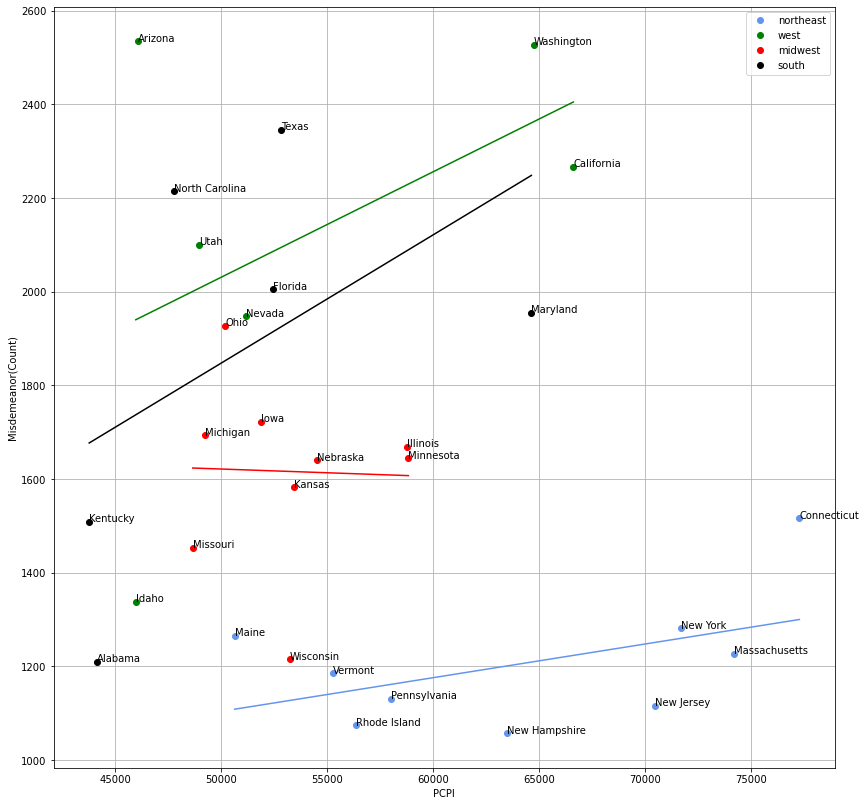

In [15]:
plt.figure(figsize=(14,14))

data='PCPI'

PCPI_northeast=make_data(northeast_data,data)
PCPI_west=make_data(west_data, data)
PCPI_midwest=make_data(midwest_data,data)
PCPI_south=make_data(south_data,data)

make_name(PCPI_northeast,data)
make_name(PCPI_west,data)
make_name(PCPI_midwest,data)
make_name(PCPI_south,data)

make_plt(PCPI_northeast,data,0)
make_plt(PCPI_west,data,1)
make_plt(PCPI_midwest,data,2)
make_plt(PCPI_south,data,3)

make_linear(PCPI_northeast,data,0)
make_linear(PCPI_west,data,1)
make_linear(PCPI_midwest,data,2)
make_linear(PCPI_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('PCPI')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [15]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.PCPI,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'PCPI',0)
spearman_corr(west_data,'PCPI',1)
spearman_corr(midwest_data,'PCPI',2)
spearman_corr(south_data,'PCPI',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.3666666666666667, pvalue=0.33173980143301507)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.3142857142857143, pvalue=0.5440932944606414)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.09999999999999999, pvalue=0.797971695234851)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.5428571428571429, pvalue=0.26570262390670557)




In [16]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.PCPI,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'PCPI',0)
spearman_corr(west_data,'PCPI',1)
spearman_corr(midwest_data,'PCPI',2)
spearman_corr(south_data,'PCPI',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.13333333333333333, pvalue=0.7323675052362975)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.48571428571428577, pvalue=0.3287230320699709)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.11666666666666665, pvalue=0.7650079429261462)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.6571428571428573, pvalue=0.15617492711370237)




In [17]:
pearson_corr(PCPI_northeast,data,0)
pearson_corr(PCPI_west,data,1)
pearson_corr(PCPI_midwest,data,2)
pearson_corr(PCPI_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor      PCPI
Misdemeanor     1.000000  0.486472
PCPI            0.486472  1.000000


======== west ======================================
pearson_corr :              Misdemeanor      PCPI
Misdemeanor     1.000000  0.469733
PCPI            0.469733  1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor      PCPI
Misdemeanor     1.000000 -0.030388
PCPI           -0.030388  1.000000


======== south ======================================
pearson_corr :              Misdemeanor      PCPI
Misdemeanor     1.000000  0.490871
PCPI            0.490871  1.000000




# GDP_Penalty

======== northeast ======================================
Score :  0.04037782759123554
RMSE :  130.35177198589759
MSE :  16991.584459863432 

기울기 :  [0.03709236]
절편 :  1189.4635254009206 


======== west ======================================
Score :  0.04586350391472005
RMSE :  399.158336893641
MSE :  159327.37791169737 

기울기 :  [0.07904454]
절편 :  2066.7944263920144 


======== midwest ======================================
Score :  0.39713070808573714
RMSE :  143.26437931886676
MSE :  20524.682381620136 

기울기 :  [0.27079293]
절편 :  1501.0109144665932 


======== south ======================================
Score :  0.3591982481780849
RMSE :  316.21235471730824
MSE :  99990.25327586476 

기울기 :  [0.48812339]
절편 :  1538.2901260605329 




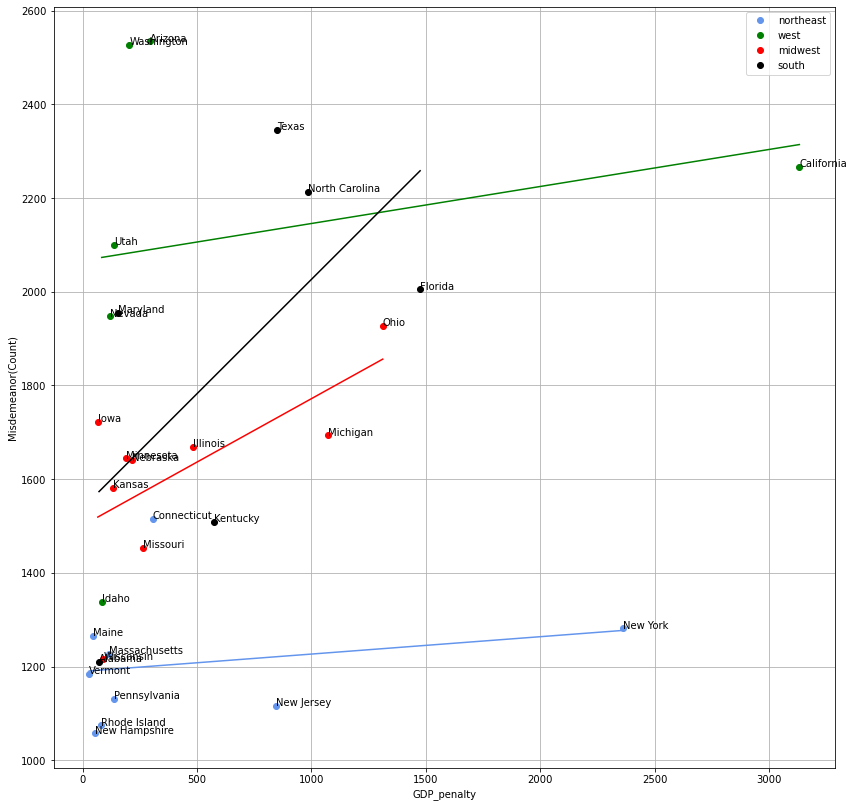

In [18]:
plt.figure(figsize=(14,14))

data='GDP_penalty'

GDP_penalty_northeast=make_data(northeast_data,data)
GDP_penalty_west=make_data(west_data, data)
GDP_penalty_midwest=make_data(midwest_data,data)
GDP_penalty_south=make_data(south_data,data)

make_name(GDP_penalty_northeast,data)
make_name(GDP_penalty_west,data)
make_name(GDP_penalty_midwest,data)
make_name(GDP_penalty_south,data)

make_plt(GDP_penalty_northeast,data,0)
make_plt(GDP_penalty_west,data,1)
make_plt(GDP_penalty_midwest,data,2)
make_plt(GDP_penalty_south,data,3)

make_linear(GDP_penalty_northeast,data,0)
make_linear(GDP_penalty_west,data,1)
make_linear(GDP_penalty_midwest,data,2)
make_linear(GDP_penalty_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('GDP_penalty')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [18]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.GDP_penalty,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'GDP_penalty',0)
spearman_corr(west_data,'GDP_penalty',1)
spearman_corr(midwest_data,'GDP_penalty',2)
spearman_corr(south_data,'GDP_penalty',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.3, pvalue=0.4328453267094823)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.8285714285714287, pvalue=0.04156268221574334)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.41666666666666663, pvalue=0.26458604674749614)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.7142857142857143, pvalue=0.1107871720116617)




In [19]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Felony_sentence_aver,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Felony_sentence_aver',0)
spearman_corr(west_data,'Felony_sentence_aver',1)
spearman_corr(midwest_data,'Felony_sentence_aver',2)
spearman_corr(south_data,'Felony_sentence_aver',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.11666666666666665, pvalue=0.7650079429261462)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=-0.5428571428571429, pvalue=0.26570262390670557)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.049999999999999996, pvalue=0.8983528043506301)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.28988551782622424, pvalue=0.5773517870348748)




In [20]:
pearson_corr(GDP_penalty_northeast,data,0)
pearson_corr(GDP_penalty_west,data,1)
pearson_corr(GDP_penalty_midwest,data,2)
pearson_corr(GDP_penalty_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor  GDP_penalty
Misdemeanor     1.000000     0.200942
GDP_penalty     0.200942     1.000000


======== west ======================================
pearson_corr :              Misdemeanor  GDP_penalty
Misdemeanor     1.000000     0.214158
GDP_penalty     0.214158     1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor  GDP_penalty
Misdemeanor     1.000000     0.630183
GDP_penalty     0.630183     1.000000


======== south ======================================
pearson_corr :              Misdemeanor  GDP_penalty
Misdemeanor     1.000000     0.599332
GDP_penalty     0.599332     1.000000




# Area_Police

======== northeast ======================================
Score :  0.00425644178997886
RMSE :  132.78241252073164
MSE :  17631.169074825753 

기울기 :  [38.52773467]
절편 :  1196.6680435621902 


======== west ======================================
Score :  0.09894335748455207
RMSE :  387.896621236954
MSE :  150463.78876704496 

기울기 :  [460.88361405]
절편 :  1407.7070970642662 


======== midwest ======================================
Score :  0.07593051214563773
RMSE :  177.36950593136817
MSE :  31459.94163433765 

기울기 :  [213.47953775]
절편 :  1403.0566053154012 


======== south ======================================
Score :  0.2649292459290806
RMSE :  338.6737691069074
MSE :  114699.92188107882 

기울기 :  [142.23506472]
절편 :  1704.2750476162748 




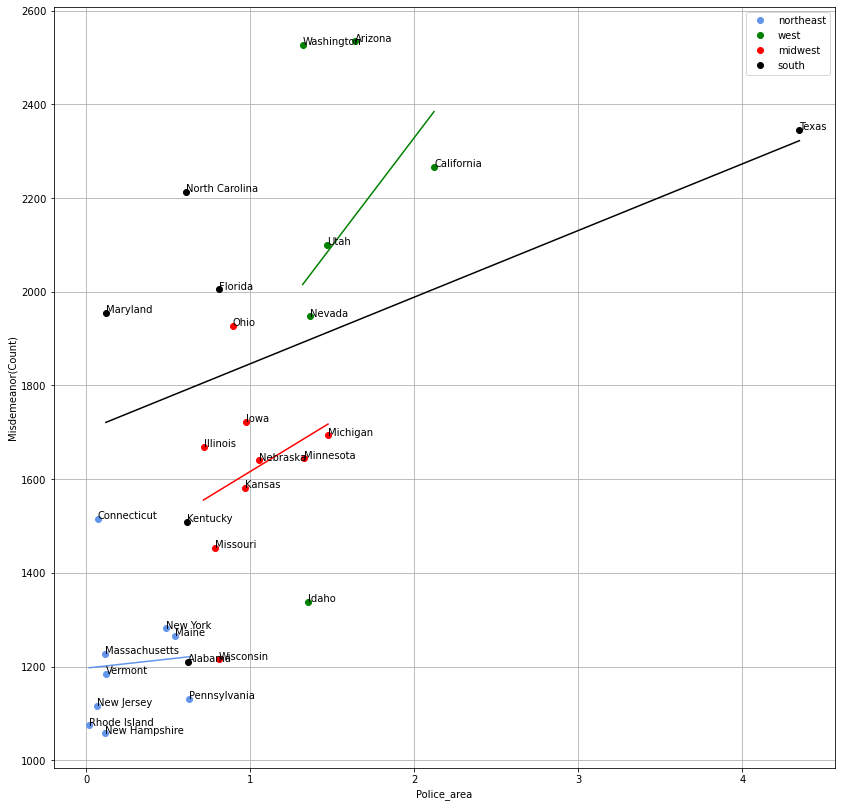

In [21]:
plt.figure(figsize=(14,14))

data='Police_area'

Police_area_northeast=make_data(northeast_data,data)
Police_area_west=make_data(west_data, data)
Police_area_midwest=make_data(midwest_data,data)
Police_area_south=make_data(south_data,data)

make_name(Police_area_northeast,data)
make_name(Police_area_west,data)
make_name(Police_area_midwest,data)
make_name(Police_area_south,data)

make_plt(Police_area_northeast,data,0)
make_plt(Police_area_west,data,1)
make_plt(Police_area_midwest,data,2)
make_plt(Police_area_south,data,3)

make_linear(Police_area_northeast,data,0)
make_linear(Police_area_west,data,1)
make_linear(Police_area_midwest,data,2)
make_linear(Police_area_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Police_area')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [21]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Police_area,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Police_area',0)
spearman_corr(west_data,'Police_area',1)
spearman_corr(midwest_data,'Police_area',2)
spearman_corr(south_data,'Police_area',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.2833333333333333, pvalue=0.46003032896571994)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.3142857142857143, pvalue=0.5440932944606414)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.3, pvalue=0.4328453267094823)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.3142857142857143, pvalue=0.5440932944606414)




In [22]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Police_area,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Police_area',0)
spearman_corr(west_data,'Police_area',1)
spearman_corr(midwest_data,'Police_area',2)
spearman_corr(south_data,'Police_area',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=-0.21666666666666667, pvalue=0.5755148957119259)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=-0.14285714285714288, pvalue=0.7871720116618075)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.48333333333333334, pvalue=0.18746985521554207)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.08571428571428573, pvalue=0.8717434402332361)




In [23]:
pearson_corr(Police_area_northeast,data,0)
pearson_corr(Police_area_west,data,1)
pearson_corr(Police_area_midwest,data,2)
pearson_corr(Police_area_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor  Police_area
Misdemeanor     1.000000     0.065241
Police_area     0.065241     1.000000


======== west ======================================
pearson_corr :              Misdemeanor  Police_area
Misdemeanor     1.000000     0.314553
Police_area     0.314553     1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor  Police_area
Misdemeanor     1.000000     0.275555
Police_area     0.275555     1.000000


======== south ======================================
pearson_corr :              Misdemeanor  Police_area
Misdemeanor     1.000000     0.514713
Police_area     0.514713     1.000000




# MSA

======== northeast ======================================
Score :  0.013759758759075202
RMSE :  132.14725972038912
MSE :  17462.898251607974 

기울기 :  [0.73124565]
절편 :  1146.9038499613862 


======== west ======================================
Score :  0.38685288854220024
RMSE :  319.9796018876079
MSE :  102386.94562415202 

기울기 :  [31.81317595]
절편 :  -689.4877993690343 


======== midwest ======================================
Score :  0.016968954118715462
RMSE :  182.94066693071687
MSE :  33467.28761705549 

기울기 :  [2.96956837]
절편 :  1393.596084592009 


======== south ======================================
Score :  0.4318007156459265
RMSE :  297.7606681084773
MSE :  88661.41547240678 

기울기 :  [17.76228921]
절편 :  378.35537564642686 




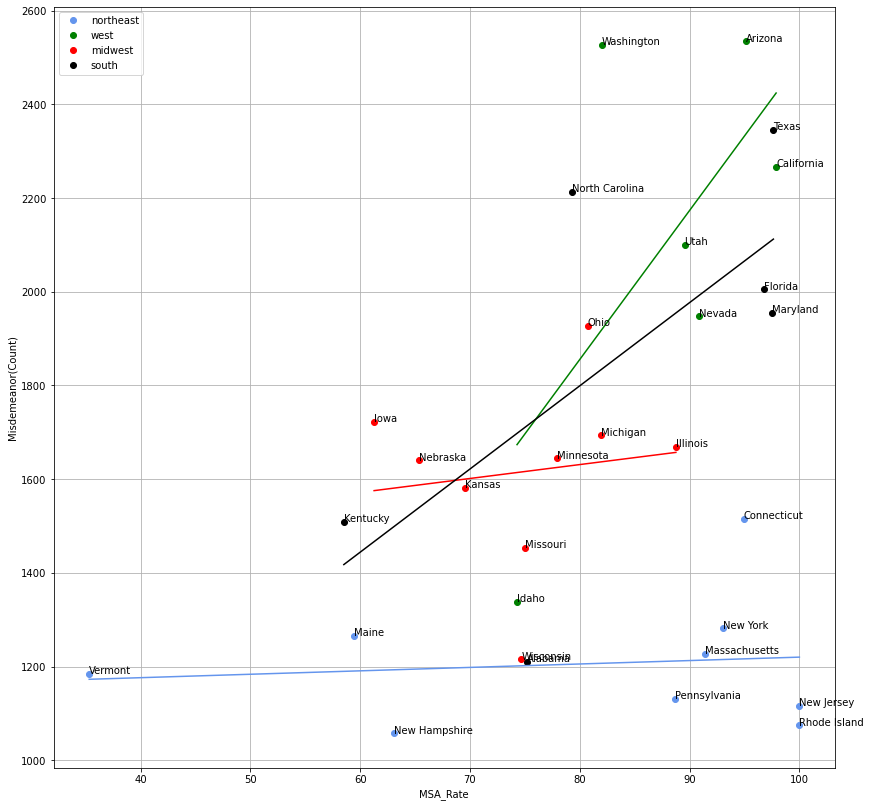

In [24]:
plt.figure(figsize=(14,14))

data='MSA_Rate'

MSA_Rate_northeast=make_data(northeast_data,data)
MSA_Rate_west=make_data(west_data, data)
MSA_Rate_midwest=make_data(midwest_data,data)
MSA_Rate_south=make_data(south_data,data)

make_name(MSA_Rate_northeast,data)
make_name(MSA_Rate_west,data)
make_name(MSA_Rate_midwest,data)
make_name(MSA_Rate_south,data)

make_plt(MSA_Rate_northeast,data,0)
make_plt(MSA_Rate_west,data,1)
make_plt(MSA_Rate_midwest,data,2)
make_plt(MSA_Rate_south,data,3)

make_linear(MSA_Rate_northeast,data,0)
make_linear(MSA_Rate_west,data,1)
make_linear(MSA_Rate_midwest,data,2)
make_linear(MSA_Rate_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('MSA_Rate')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [23]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.MSA_Rate,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'MSA_Rate',0)
spearman_corr(west_data,'MSA_Rate',1)
spearman_corr(midwest_data,'MSA_Rate',2)
spearman_corr(south_data,'MSA_Rate',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=-0.05857791861290061, pvalue=0.8810067501468761)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.48571428571428577, pvalue=0.3287230320699709)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.2833333333333333, pvalue=0.46003032896571994)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.7142857142857143, pvalue=0.1107871720116617)




In [24]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.MSA_Rate,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'MSA_Rate',0)
spearman_corr(west_data,'MSA_Rate',1)
spearman_corr(midwest_data,'MSA_Rate',2)
spearman_corr(south_data,'MSA_Rate',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.6108840083916779, pvalue=0.08054182080979312)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.3142857142857143, pvalue=0.5440932944606414)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.09999999999999999, pvalue=0.797971695234851)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.7714285714285715, pvalue=0.07239650145772594)




In [26]:
pearson_corr(MSA_Rate_northeast,data,0)
pearson_corr(MSA_Rate_west,data,1)
pearson_corr(MSA_Rate_midwest,data,2)
pearson_corr(MSA_Rate_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor  MSA_Rate
Misdemeanor     1.000000  0.117302
MSA_Rate        0.117302  1.000000


======== west ======================================
pearson_corr :              Misdemeanor  MSA_Rate
Misdemeanor     1.000000  0.621975
MSA_Rate        0.621975  1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor  MSA_Rate
Misdemeanor     1.000000  0.130265
MSA_Rate        0.130265  1.000000


======== south ======================================
pearson_corr :              Misdemeanor  MSA_Rate
Misdemeanor     1.000000  0.657115
MSA_Rate        0.657115  1.000000




# Old_Rate

======== northeast ======================================
Score :  0.0008623465515127382
RMSE :  133.00852132123725
MSE :  17691.266744062028 

기울기 :  [-2.62947674]
절편 :  1253.9424360465114 


======== west ======================================
Score :  0.010459716530720087
RMSE :  406.4963868986994
MSE :  165239.31256169715 

기울기 :  [20.61967205]
절편 :  1801.2298891743858 


======== midwest ======================================
Score :  0.0012914884457533304
RMSE :  184.39367360806395
MSE :  34001.02686667722 

기울기 :  [-10.34792544]
절편 :  1791.4765604329516 


======== south ======================================
Score :  0.10913368074411556
RMSE :  372.8406522370143
MSE :  139010.15196052223 

기울기 :  [-55.46876236]
절편 :  2803.9262282559603 




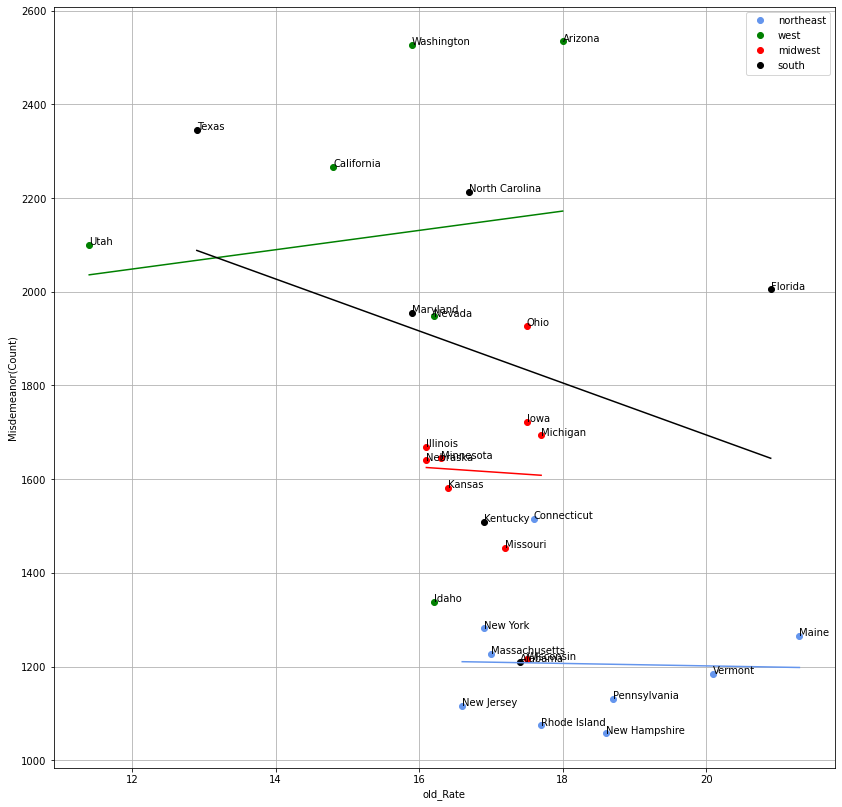

In [27]:
plt.figure(figsize=(14,14))

data='older_rate'

older_rate_northeast=make_data(northeast_data,data)
older_rate_west=make_data(west_data, data)
older_rate_midwest=make_data(midwest_data,data)
older_rate_south=make_data(south_data,data)

make_name(older_rate_northeast,data)
make_name(older_rate_west,data)
make_name(older_rate_midwest,data)
make_name(older_rate_south,data)

make_plt(older_rate_northeast,data,0)
make_plt(older_rate_west,data,1)
make_plt(older_rate_midwest,data,2)
make_plt(older_rate_south,data,3)

make_linear(older_rate_northeast,data,0)
make_linear(older_rate_west,data,1)
make_linear(older_rate_midwest,data,2)
make_linear(older_rate_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('old_Rate')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [25]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.older_rate,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'older_rate',0)
spearman_corr(west_data,'older_rate',1)
spearman_corr(midwest_data,'older_rate',2)
spearman_corr(south_data,'older_rate',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=-0.08333333333333334, pvalue=0.831214097710308)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.11595420713048968, pvalue=0.826848213385815)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.27240208984279957, pvalue=0.4782460994671084)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.5428571428571429, pvalue=0.26570262390670557)




In [26]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.older_rate,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'older_rate',0)
spearman_corr(west_data,'older_rate',1)
spearman_corr(midwest_data,'older_rate',2)
spearman_corr(south_data,'older_rate',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=-0.41666666666666663, pvalue=0.26458604674749614)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.28988551782622424, pvalue=0.5773517870348748)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.6043921368387115, pvalue=0.08472101397497639)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.7714285714285715, pvalue=0.07239650145772594)




In [29]:
pearson_corr(older_rate_northeast,data,0)
pearson_corr(older_rate_west,data,1)
pearson_corr(older_rate_midwest,data,2)
pearson_corr(older_rate_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor  older_rate
Misdemeanor     1.000000   -0.029366
older_rate     -0.029366    1.000000


======== west ======================================
pearson_corr :              Misdemeanor  older_rate
Misdemeanor     1.000000    0.102273
older_rate      0.102273    1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor  older_rate
Misdemeanor     1.000000   -0.035937
older_rate     -0.035937    1.000000


======== south ======================================
pearson_corr :              Misdemeanor  older_rate
Misdemeanor     1.000000   -0.330354
older_rate     -0.330354    1.000000




# Gender(Female_rate)

======== northeast ======================================
Score :  0.13861430850799794
RMSE :  123.49962219546077
MSE :  15252.156682421548 

기울기 :  [145.58342217]
절편 :  -6226.9610543710605 


======== west ======================================
Score :  0.1561722462779529
RMSE :  375.3763033053793
MSE :  140907.3690832121 

기울기 :  [630.72076271]
절편 :  -29395.8976101697 


======== midwest ======================================
Score :  0.11288955051082894
RMSE :  173.7862806333249
MSE :  30201.671336364758 

기울기 :  [168.68923218]
절편 :  -6898.690908592365 


======== south ======================================
Score :  0.1693742484506795
RMSE :  360.0142445440636
MSE :  129610.25627463282 

기울기 :  [-325.86515625]
절편 :  18535.54715625009 




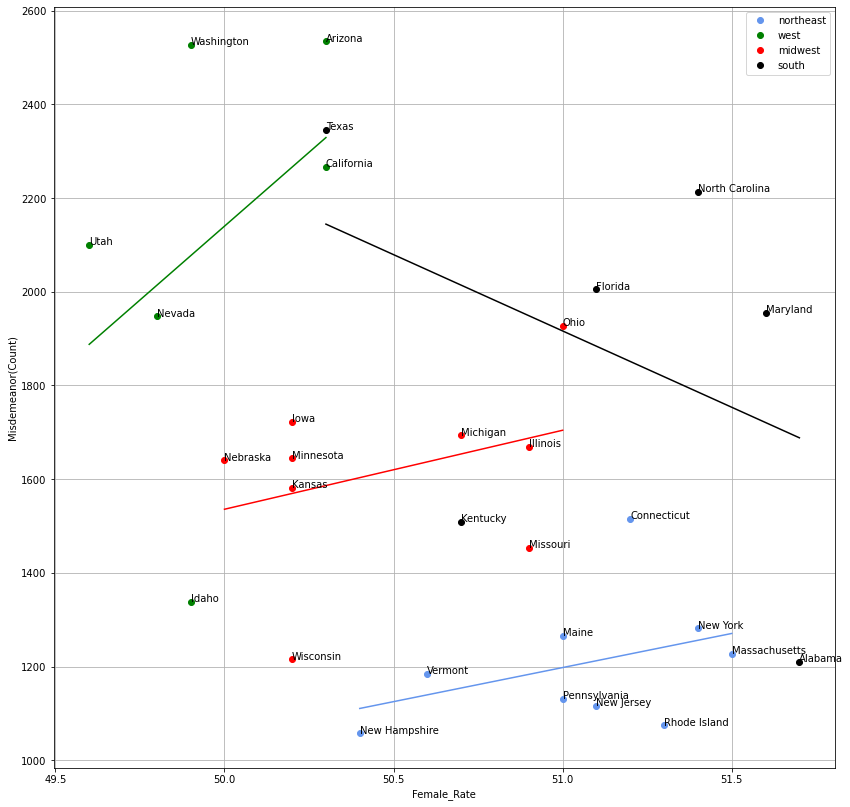

In [30]:
plt.figure(figsize=(14,14))

data='Female_Rate'

Female_Rate_northeast=make_data(northeast_data,data)
Female_Rate_west=make_data(west_data, data)
Female_Rate_midwest=make_data(midwest_data,data)
Female_Rate_south=make_data(south_data,data)

make_name(Female_Rate_northeast,data)
make_name(Female_Rate_west,data)
make_name(Female_Rate_midwest,data)
make_name(Female_Rate_south,data)

make_plt(Female_Rate_northeast,data,0)
make_plt(Female_Rate_west,data,1)
make_plt(Female_Rate_midwest,data,2)
make_plt(Female_Rate_south,data,3)

make_linear(Female_Rate_northeast,data,0)
make_linear(Female_Rate_west,data,1)
make_linear(Female_Rate_midwest,data,2)
make_linear(Female_Rate_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Female_Rate')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [27]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Female_Rate,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Female_Rate',0)
spearman_corr(west_data,'Female_Rate',1)
spearman_corr(midwest_data,'Female_Rate',2)
spearman_corr(south_data,'Female_Rate',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.4267819784654187, pvalue=0.2519566902874007)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.5590653920196746, pvalue=0.24877100570170096)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.3759798615206846, pvalue=0.31864671185858834)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.6, pvalue=0.20799999999999982)




In [28]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Female_Rate,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Female_Rate',0)
spearman_corr(west_data,'Female_Rate',1)
spearman_corr(midwest_data,'Female_Rate',2)
spearman_corr(south_data,'Female_Rate',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.3096261412396175, pvalue=0.4174779170120546)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.0, pvalue=1.0)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.06120602396848353, pvalue=0.8757007084046126)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.48571428571428577, pvalue=0.3287230320699709)




In [32]:
pearson_corr(Female_Rate_northeast,data,0)
pearson_corr(Female_Rate_west,data,1)
pearson_corr(Female_Rate_midwest,data,2)
pearson_corr(Female_Rate_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor  Female_Rate
Misdemeanor     1.000000     0.372309
Female_Rate     0.372309     1.000000


======== west ======================================
pearson_corr :              Misdemeanor  Female_Rate
Misdemeanor     1.000000     0.395186
Female_Rate     0.395186     1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor  Female_Rate
Misdemeanor      1.00000      0.33599
Female_Rate      0.33599      1.00000


======== south ======================================
pearson_corr :              Misdemeanor  Female_Rate
Misdemeanor     1.000000    -0.411551
Female_Rate    -0.411551     1.000000




# Travel

======== northeast ======================================
Score :  0.017735892540312492
RMSE :  131.880607732944
MSE :  17392.494696010646 

기울기 :  [0.0007113]
절편 :  1189.6949790514561 


======== west ======================================
Score :  0.05103446002517298
RMSE :  398.07524534253133
MSE :  158463.90095451652 

기울기 :  [0.00187276]
절편 :  2041.6483049190235 


======== midwest ======================================
Score :  0.16230981782753906
RMSE :  168.87616336757642
MSE :  28519.158553752357 

기울기 :  [0.00656797]
절편 :  1497.6445289221685 


======== south ======================================
Score :  0.3331545058868187
RMSE :  322.57417821243337
MSE :  104054.10044942673 

기울기 :  [0.0063931]
절편 :  1611.4417855104193 




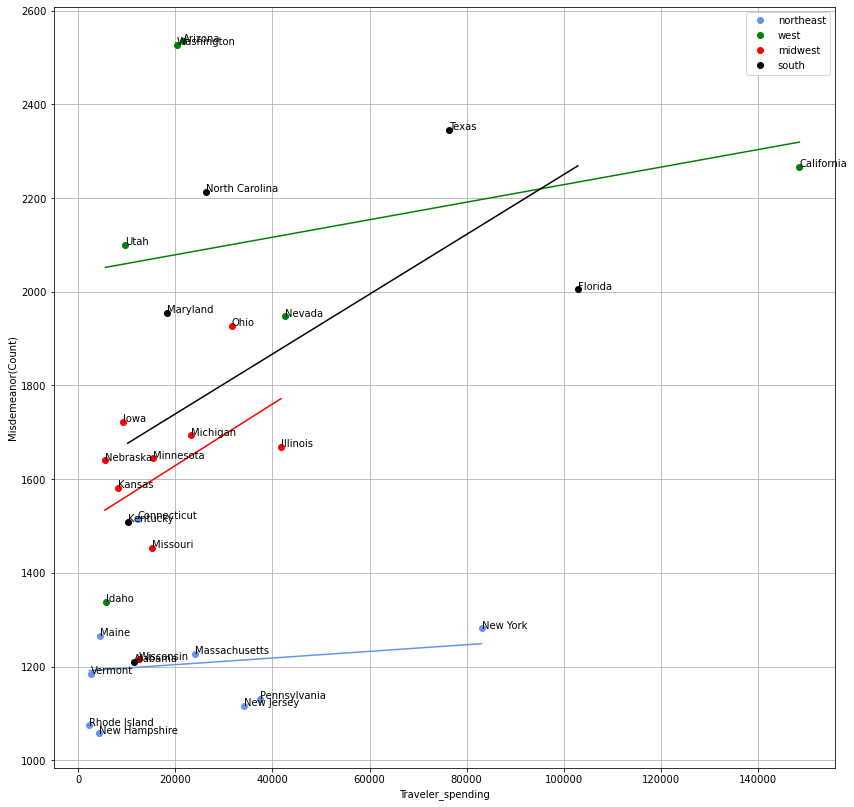

In [33]:
plt.figure(figsize=(14,14))

data='Traveler_spending'

Traveler_spending_northeast=make_data(northeast_data,data)
Traveler_spending_west=make_data(west_data, data)
Traveler_spending_midwest=make_data(midwest_data,data)
Traveler_spending_south=make_data(south_data,data)

make_name(Traveler_spending_northeast,data)
make_name(Traveler_spending_west,data)
make_name(Traveler_spending_midwest,data)
make_name(Traveler_spending_south,data)

make_plt(Traveler_spending_northeast,data,0)
make_plt(Traveler_spending_west,data,1)
make_plt(Traveler_spending_midwest,data,2)
make_plt(Traveler_spending_south,data,3)

make_linear(Traveler_spending_northeast,data,0)
make_linear(Traveler_spending_west,data,1)
make_linear(Traveler_spending_midwest,data,2)
make_linear(Traveler_spending_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Traveler_spending')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [29]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Traveler_spending,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))

spearman_corr(northeast_data,'Traveler_spending',0)
spearman_corr(west_data,'Traveler_spending',1)
spearman_corr(midwest_data,'Traveler_spending',2)
spearman_corr(south_data,'Traveler_spending',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.39999999999999997, pvalue=0.2861051019083129)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.3714285714285715, pvalue=0.46847813411078715)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.4666666666666666, pvalue=0.20538635110581185)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.7714285714285715, pvalue=0.07239650145772594)




In [30]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Traveler_spending,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Traveler_spending',0)
spearman_corr(west_data,'Traveler_spending',1)
spearman_corr(midwest_data,'Traveler_spending',2)
spearman_corr(south_data,'Traveler_spending',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.25, pvalue=0.5164895523012263)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.6, pvalue=0.20799999999999982)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.3, pvalue=0.4328453267094823)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.6, pvalue=0.20799999999999982)




In [35]:
pearson_corr(Traveler_spending_northeast,data,0)
pearson_corr(Traveler_spending_west,data,1)
pearson_corr(Traveler_spending_midwest,data,2)
pearson_corr(Traveler_spending_south,data,3)

======== northeast ======================================
pearson_corr :                    Misdemeanor  Traveler_spending
Misdemeanor           1.000000           0.133176
Traveler_spending     0.133176           1.000000


======== west ======================================
pearson_corr :                    Misdemeanor  Traveler_spending
Misdemeanor           1.000000           0.225908
Traveler_spending     0.225908           1.000000


======== midwest ======================================
pearson_corr :                    Misdemeanor  Traveler_spending
Misdemeanor           1.000000           0.402877
Traveler_spending     0.402877           1.000000


======== south ======================================
pearson_corr :                    Misdemeanor  Traveler_spending
Misdemeanor           1.000000           0.577195
Traveler_spending     0.577195           1.000000




# Temperature

======== northeast ======================================
Score :  0.008192992780433395
RMSE :  132.51968304118074
MSE :  17561.466393335006 

기울기 :  [-6.07802408]
절편 :  1255.9913763204224 


======== west ======================================
Score :  0.4216718961939574
RMSE :  310.7614212967009
MSE :  96572.66096634563 

기울기 :  [80.86985139]
절편 :  1229.5481346749223 


======== midwest ======================================
Score :  0.027112313009114097
RMSE :  181.99438729920675
MSE :  33121.957008413665 

기울기 :  [12.06441053]
절편 :  1505.6421878212116 


======== south ======================================
Score :  0.03799565930047888
RMSE :  387.4409356786057
MSE :  150110.47863951346 

기울기 :  [24.52141481]
절편 :  1475.7285801217038 




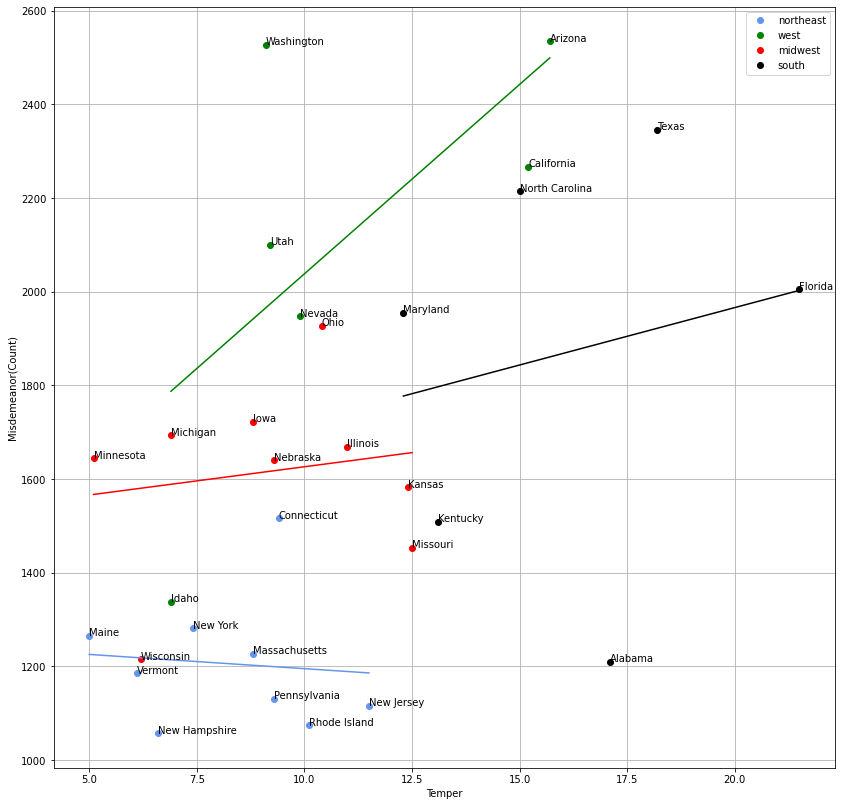

In [36]:
plt.figure(figsize=(14,14))

data='Temper'

Temper_northeast=make_data(northeast_data,data)
Temper_west=make_data(west_data, data)
Temper_midwest=make_data(midwest_data,data)
Temper_south=make_data(south_data,data)

make_name(Temper_northeast,data)
make_name(Temper_west,data)
make_name(Temper_midwest,data)
make_name(Temper_south,data)

make_plt(Temper_northeast,data,0)
make_plt(Temper_west,data,1)
make_plt(Temper_midwest,data,2)
make_plt(Temper_south,data,3)

make_linear(Temper_northeast,data,0)
make_linear(Temper_west,data,1)
make_linear(Temper_midwest,data,2)
make_linear(Temper_south,data,3)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Temper')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [33]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Temper,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Temper',0)
spearman_corr(west_data,'Temper',1)
spearman_corr(midwest_data,'Temper',2)
spearman_corr(south_data,'Temper',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=-0.21666666666666667, pvalue=0.5755148957119259)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.6, pvalue=0.20799999999999982)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.11666666666666665, pvalue=0.7650079429261462)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.3714285714285715, pvalue=0.46847813411078715)




In [34]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Temper,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Temper',0)
spearman_corr(west_data,'Temper',1)
spearman_corr(midwest_data,'Temper',2)
spearman_corr(south_data,'Temper',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.6333333333333333, pvalue=0.06708578689234565)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=0.3714285714285715, pvalue=0.46847813411078715)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.65, pvalue=0.05807305801714863)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.08571428571428573, pvalue=0.8717434402332361)




In [38]:
pearson_corr(Temper_northeast,data,0)
pearson_corr(Temper_west,data,1)
pearson_corr(Temper_midwest,data,2)
pearson_corr(Temper_south,data,3)

======== northeast ======================================
pearson_corr :              Misdemeanor    Temper
Misdemeanor     1.000000 -0.090515
Temper         -0.090515  1.000000


======== west ======================================
pearson_corr :              Misdemeanor    Temper
Misdemeanor     1.000000  0.649363
Temper          0.649363  1.000000


======== midwest ======================================
pearson_corr :              Misdemeanor    Temper
Misdemeanor     1.000000  0.164658
Temper          0.164658  1.000000


======== south ======================================
pearson_corr :              Misdemeanor    Temper
Misdemeanor     1.000000  0.194925
Temper          0.194925  1.000000




In [39]:
List=['GDP','Education','Happy','PCPI','GDP_penalty','Area_police','MSA','Old_rate','Gender','Travel','Temperature']
northeast_corr=['0.25','0.2666','0.1833','0.3666','0.3','0.2833','-0.0585','-0.0833','0.4267','0.3999','-0.2166']
west_corr=['0.7714','0.4285','-0.3714','0.3142','0.8285','0.3142','0.4857','0.1159','0.5590','0.3714','0.6']
midwest_corr=['0.45','0.3666','0.0499','-0.0999','0.4166','0.3','0.2833','0.2724','0.3759','0.4666','-0.1166']
south_corr=['0.8857','-0.6','0.5428','0.5428','0.7142','0.3142','0.7142','-0.5428','-0.6','0.7714','0.3714']

northeast_pvalue=['0.5164','0.4879','0.6368','0.3317','0.4328','0.4600','0.8810','0.8312','0.2519','0.2861','0.5755']
west_pvalue=['0.0723','0.3965','0.4684','0.5440','0.4156','0.5440','0.3287','0.8268','0.2487','0.4684','0.2079']
midwest_pvalue=['0.2242','0.3317','0.8983','0.7979','0.2645','0.4328','0.4600','0.4782','0.3186','0.2053','0.7650']
south_pvalue=['0.0188','0.2079','0.2657','0.2657','0.1107','0.5440','0.1107','0.2657','0.2079','0.0723','0.4684']

result_spear=pd.DataFrame({'corr(northeast)':northeast_corr,'corr(west)':west_corr,'corr(midwest)':midwest_corr,'corr(south)':south_corr,'pvalue(northeast)':northeast_pvalue,'pvalue(west)':west_pvalue,'pvalue(midwest)':midwest_pvalue,'pvalue(south)':south_pvalue},index=List)
result_spear

,corr(northeast),corr(west),corr(midwest),corr(south),pvalue(northeast),pvalue(west),pvalue(midwest),pvalue(south)
GDP,0.25,0.7714,0.45,0.8857,0.5164,0.0723,0.2242,0.0188
Education,0.2666,0.4285,0.3666,-0.6,0.4879,0.3965,0.3317,0.2079
Happy,0.1833,-0.3714,0.0499,0.5428,0.6368,0.4684,0.8983,0.2657
PCPI,0.3666,0.3142,-0.0999,0.5428,0.3317,0.5440,0.7979,0.2657
GDP_penalty,0.3,0.8285,0.4166,0.7142,0.4328,0.4156,0.2645,0.1107
Area_police,0.2833,0.3142,0.3,0.3142,0.4600,0.5440,0.4328,0.5440
MSA,-0.0585,0.4857,0.2833,0.7142,0.8810,0.3287,0.4600,0.1107
Old_rate,-0.0833,0.1159,0.2724,-0.5428,0.8312,0.8268,0.4782,0.2657
Gender,0.4267,0.5590,0.3759,-0.6,0.2519,0.2487,0.3186,0.2079
Travel,0.3999,0.3714,0.4666,0.7714,0.2861,0.4684,0.2053,0.0723


In [35]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Gun_ownership,body.Misdemeanor)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Gun_ownership',0)
spearman_corr(west_data,'Gun_ownership',1)
spearman_corr(midwest_data,'Gun_ownership',2)
spearman_corr(south_data,'Gun_ownership',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=0.08333333333333334, pvalue=0.831214097710308)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=-0.48571428571428577, pvalue=0.3287230320699709)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=-0.8151548326115373, pvalue=0.007423781373494626)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=-0.4285714285714286, pvalue=0.3965014577259474)




In [36]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Gun_ownership,body.Felony)
    
    print("========",region[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(northeast_data,'Gun_ownership',0)
spearman_corr(west_data,'Gun_ownership',1)
spearman_corr(midwest_data,'Gun_ownership',2)
spearman_corr(south_data,'Gun_ownership',3)

======== northeast ======================================
spearman_corr : SpearmanrResult(correlation=-0.5333333333333333, pvalue=0.13922686754397814)


======== west ======================================
spearman_corr : SpearmanrResult(correlation=-0.6, pvalue=0.20799999999999982)


======== midwest ======================================
spearman_corr : SpearmanrResult(correlation=0.6218706970438532, pvalue=0.0737649506248493)


======== south ======================================
spearman_corr : SpearmanrResult(correlation=0.48571428571428577, pvalue=0.3287230320699709)


